In [5]:
import pandas as pd

data = pd.read_csv("Titanic-Dataset.csv")
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# fill age
data['Age'] = data['Age'].fillna(data['Age'].median())

# drop columns if exist
cols_to_drop = ['Cabin','Ticket','Name','PassengerId']
data = data.drop(columns=[c for c in cols_to_drop if c in data.columns])

# encode sex
data['Sex'] = data['Sex'].map({'male':0,'female':1})

# features target
X = data.drop('Survived', axis=1)
y = data['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, pred))


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [10]:
# check missing values
data.isnull().sum()


,0
Survived,0
Pclass,0
Sex,891
Age,0
SibSp,0
Parch,0
Fare,0
Embarked_Q,0
Embarked_S,0


In [12]:
# fill numeric columns with median
for col in data.select_dtypes(include=['float64','int64']).columns:
    data[col] = data[col].fillna(data[col].median())


In [13]:
X = data.drop('Survived', axis=1)
y = data['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, pred))


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [14]:
X.isnull().sum()


,0
Pclass,0
Sex,891
Age,0
SibSp,0
Parch,0
Fare,0
Embarked_Q,0
Embarked_S,0


In [15]:
# fill ALL remaining NaN with median (numeric only)
X = X.apply(lambda col: col.fillna(col.median()) if col.dtype != 'object' else col)


In [16]:
X = X.select_dtypes(exclude=['object'])


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, pred))


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [19]:
data.columns
data.isnull().sum()



,0
Survived,0
Pclass,0
Sex,891
Age,0
SibSp,0
Parch,0
Fare,0
Embarked_Q,0
Embarked_S,0


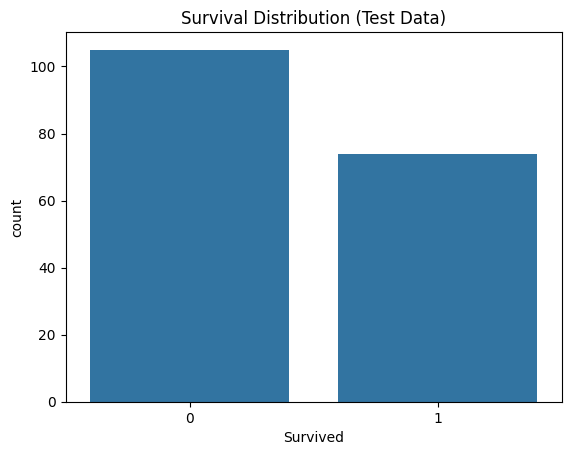

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_test)
plt.title("Survival Distribution (Test Data)")
plt.show()


In [21]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))



[[90 15]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

